# Esonero 1 - 8 Aprile 2021

Completare i seguenti esercizi tramite uno o più blocchi di codice e descrivendo le operazioni effettuate

### Punteggio Esercizi

    1a: 1
    1b: 1.5
    1c: 2
    1d: 1
    2: 1.5
    3: 1
    4: 1
    5: 1


In [13]:
import numpy as np
from skimage.color import rgb2gray
from scipy.ndimage import convolve

import imageio
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    # utility function to show image
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

# Esercizio 1

## Filtri di Gabor

Il filtro di Gabor (in forma semplificata) è definito dalla seguente funzione che restituisce due parti (reale e immaginaria)


$$RE_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \cos \theta)$$

$$IM_g(x,y,\omega,\theta) = \frac{\omega^2}{4\pi^3}\left[\exp\left\{-(\omega^2/8\pi^2) (4x'^2 + y'^2)\right\}\right]\exp\left(\pi^2/2\right)(\omega x \sin \theta)$$

dove $x' = x \cos \theta + y \sin \theta$ e $y' = y \cos \theta. - x \sin \theta$. L'implementazione è data dal codice sottostante: 

In [14]:
zebra =  rgb2gray(imageio.imread('zebra.jpg'))

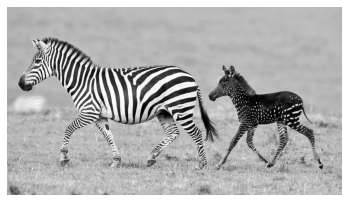

In [15]:
myimshow(zebra)

In [16]:
def genGabor(sz, omega, theta, func=np.cos):
    radius = (int(sz[0]/2.0), int(sz[1]/2.0))
    [x, y] = np.meshgrid(range(-radius[0], radius[0]), range(-radius[1], radius[1]))

    x1 = x * np.cos(theta) + y * np.sin(theta)
    y1 = -x * np.sin(theta) + y * np.cos(theta)
    
    gauss = omega**2 / (4*np.pi**3) * np.exp(- omega**2 / (8*np.pi**2) * ( 4 * x1**2 + y1**2))
    sinusoid = func(omega * x1) * np.exp(np.pi**2 / 2)
    gabor = gauss * sinusoid
    return gabor

`sz` rappresenta la dimensione del filtro, `omega` la frequenza e `theta` l'orientamento.

1. Plottare il filtro per valori a scelta dei parametri

In [80]:
sz = zebra.shape
omega = 0.10
tetha = np.pi/4 #converte l'angolo a radianti

2. Applicare il filtro di Gabor alla figura della zebra e plottare il risultato. Cosa potete dire del filtro?

In [81]:
from scipy.signal import convolve2d

gabor = genGabor(sz, omega, tetha, func = np.cos )
apply = convolve2d(zebra, gabor, mode = 'full')
plt.imshow(gabor)

3. Aggiustare i parametri di ampiezza e rotazione per individuare le strisce verticali. plottare il risultato

Per la seguente immagine _gabor1.jpg_

![](gabor1.jpg)

4. Qual è il filtro più semplice che permetterebbe di individuare i contorni? Giustificare la risposta

# Esercizio 2

Riconoscere il filtro che ha generato questa immagine a partire dall'immagine contenente le forme. Fornire un esempio.

![](filter2.jpg)

In [17]:
#prendo l'immagine
from PIL import Image
import numpy as np

img_quadrati = io.imread('quadrati.jpg')

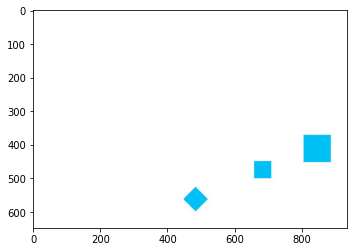

In [19]:
def plot_image(img):
    plt.figure()
    plt.imshow(img)
    plt.show()

plot_image(img_quadrati)


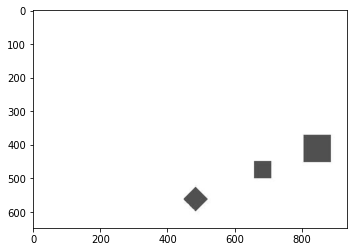

In [21]:
#conversione in scala di grigio
import skdemo
from skimage import io, color

grigio_quadrati = color.rgb2gray(img_quadrati)

plt.imshow(grigio_quadrati, cmap = 'gray');

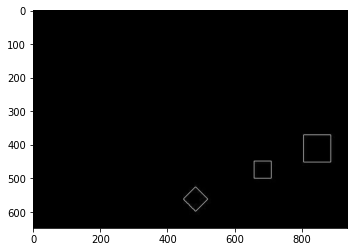

In [24]:
#l'applicazione del filtro di sobel avrebbe dovuto dare l'immagine richiesta
from skimage import filters
Sobel = filters.sobel(grigio_quadrati)
plt.imshow(Sobel);

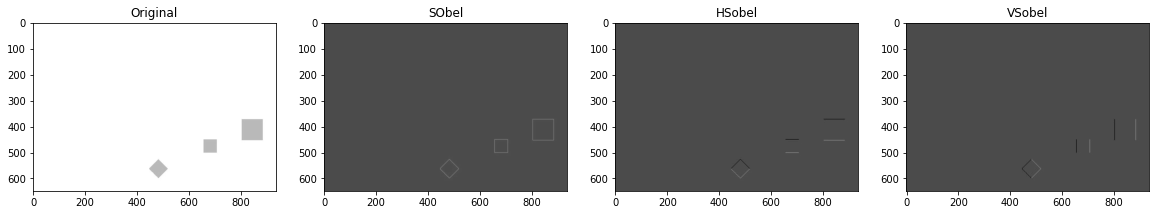

In [25]:
#se appico tutti i filtri ho il risultato della foto in SObel
original = io.imread('quadrati.jpg')
original = color.rgb2gray(original)

filtro = filters.sobel(original)
h_result = filters.sobel_h(original)
v_result = filters.sobel_v(original)
skdemo.imshow_all(original, filtro, h_result, v_result, 
                  titles=('Original', 'SObel', 'HSobel', 'VSobel'))

# Esercizio 3

Mostrare gli effetti e spiegare cosa succedequando si applica due volte un filtro gaussiano

Data un'immagine _img_ applicare il filtro gaussiano G

img1 = G(G(img))

A cosa equivale questa trasformazione?
Fornire un esempio

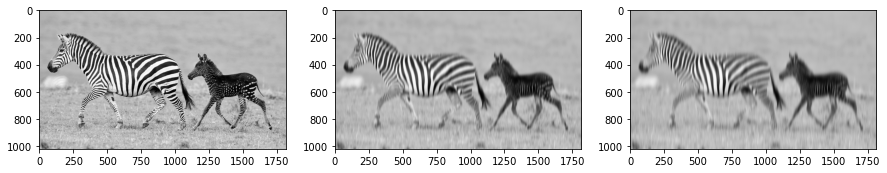

In [29]:
#il filtro gaussiano è la risposta alla funzione gaussiana e ha l'effetto di smooting che dipende dall'ampiezza del filtro. il filtro di gauss serve a ridurre l'effetto di blurring
img_z = imageio.imread('zebra.jpg')
grigio_z = color.rgb2gray(img_z)
gaussian_result = filters.gaussian(grigio_z, sigma=10, multichannel=True)
gaussian_two = filters.gaussian(gaussian_result, sigma=10, multichannel=True)

skdemo.imshow_all(grigio_z, gaussian_result, gaussian_two)

# Esercizio 4

Spiegare e mostrare con un esempio numerico i vantaggi e gli svantaggi di applicare un filtro 5x5 oppure due filtri 5x1 e 1x5 in sequenza. 

![](forme.jpg)

# Esercizio 5

Definire una matrice di roto traslazione che effettua una rotazione di 60° in senso orario in (5, 5) e una traslazione di 50 px sull'asse y.

Mostrare e descrivere tutti i passaggi: dalla definizione della matrice all'applicazione della trasformazione

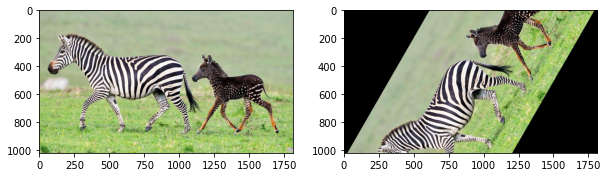

In [35]:
# traslazione di 60° dell'immagine della zabra
from skimage import transform
img_new = imageio.imread('zebra.jpg')
rotated = transform.rotate(image_new, 60)

skdemo.imshow_all(image, rotated)

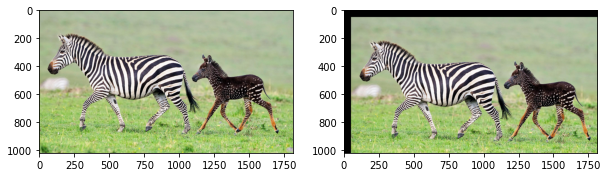

In [39]:
#traslazione di 50 px dell'immagine della zebra
from skimage.transform import SimilarityTransform
img_new = imageio.imread('zebra.jpg')

tform = SimilarityTransform(translation=(-50))
warped = transform.warp(img_new, tform)

skdemo.imshow_all(image_new, warped)